In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

In [3]:
# Load data
df = pd.read_csv(r"C:\Users\tanya\credit_card_fraud_detection\archive (10)\creditcard.csv")

# Drop 'Time' column (not helpful), scale 'Amount'
df.drop('Time', axis=1, inplace=True)

# Normalize 'Amount'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Stratified split to preserve class imbalance ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 199364
Testing samples: 85443


In [6]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



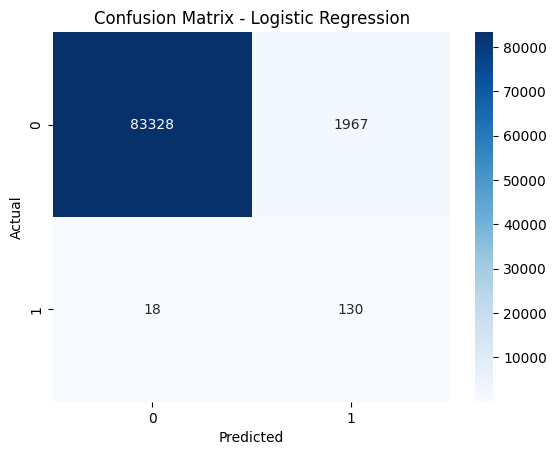

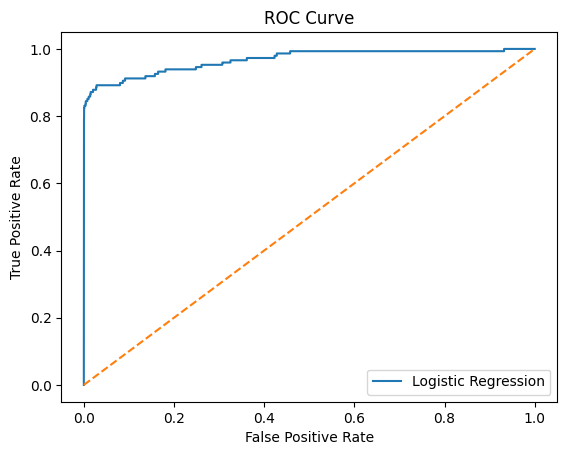

ROC-AUC Score: 0.9676177115036368


In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC
y_score_lr = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_score_lr))

In [11]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



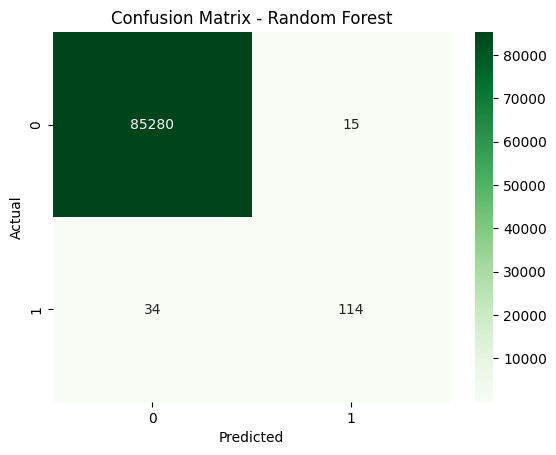

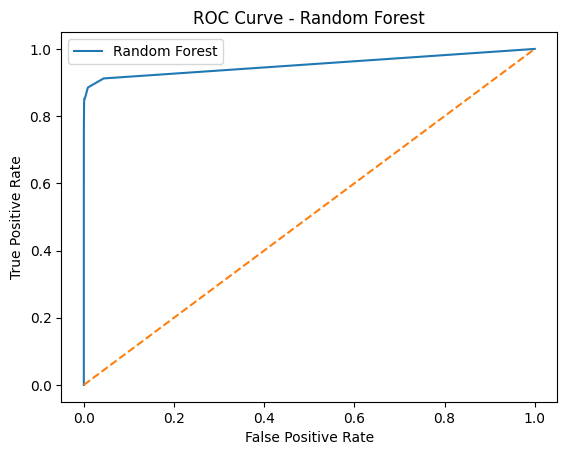

ROC-AUC Score: 0.9532102021125411


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_score_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_score_rf))

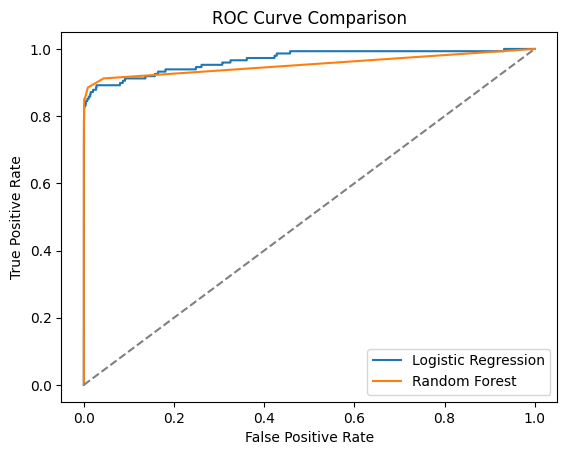

In [13]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--", color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [20]:
import joblib
joblib.dump(rf, "C:/Users/tanya/credit_card_fraud_detection/outputs/rf_model.pkl")


['C:/Users/tanya/credit_card_fraud_detection/outputs/rf_model.pkl']